In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Car_Purchasing_Data.csv", encoding='ISO-8859-1')

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Customer Name          500 non-null object
Customer e-mail        500 non-null object
Country                500 non-null object
Gender                 500 non-null int64
Age                    500 non-null float64
Annual Salary          500 non-null float64
Credit Card Debt       500 non-null float64
Net Worth              500 non-null float64
Car Purchase Amount    500 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


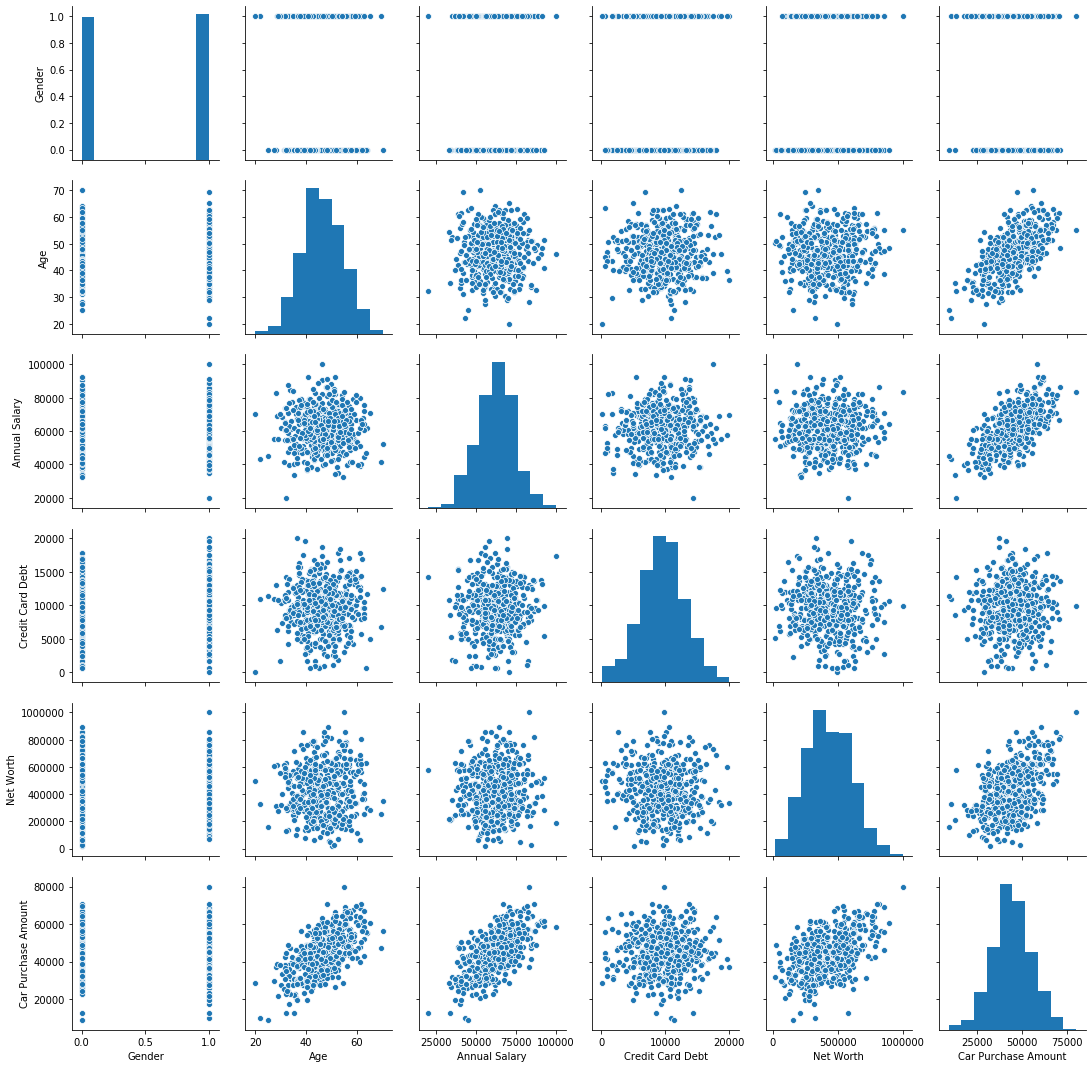

In [6]:
# Visualization
sns.pairplot(df) # no gender column, as it is a categorical feature

In [7]:
X = df.drop(["Customer Name", "Customer e-mail", "Country", "Car Purchase Amount"], axis=1)

In [8]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [9]:
y = df["Car Purchase Amount"]

In [10]:
y[0:10]

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
5    56611.99784
6    28925.70549
7    47434.98265
8    48013.61410
9    38189.50601
Name: Car Purchase Amount, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled[0:10]

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       [1.        , 0.76542739, 0.74212547, 0.71990778, 0.53938679],
       [1.        , 0.74627499, 0.49661439, 0.26425689, 0.55133068],
       [1.        , 0.73649786, 0.60624815, 0.70751118, 0.4168218 ],
       [1.        , 0.5321463 , 0.24768153, 0.29439498, 0.3126257 ],
       [1.        , 0.60386032, 0.39690293, 0.54701993, 0.62174735],
       [0.        , 0.53169489, 0.47674074, 0.16788059, 0.62250921],
       [1.        , 0.46647563, 0.41821377, 0.64241601, 0.46596261]])

In [13]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [14]:
y = y.values.reshape(-1, 1)

In [15]:
y_scaled = scaler.fit_transform(y)

In [16]:
y[0:10]

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=50)

In [19]:
X_train.shape

(375, 5)

In [20]:
X_test.shape

(125, 5)

In [21]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

Using TensorFlow backend.


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
ep_history=model.fit(X_train, y_train, epochs=50, batch_size=25, verbose=1, validation_split=0.2)

Train on 300 samples, validate on 75 samples
Epoch 1/50
300/300 [==============================] - 0s 469us/step - loss: 0.5425 - val_loss: 0.3901
Epoch 2/50
300/300 [==============================] - 0s 63us/step - loss: 0.3252 - val_loss: 0.2371
Epoch 3/50
300/300 [==============================] - 0s 60us/step - loss: 0.1977 - val_loss: 0.1419
Epoch 4/50
300/300 [==============================] - 0s 63us/step - loss: 0.1121 - val_loss: 0.0714
Epoch 5/50
300/300 [==============================] - 0s 57us/step - loss: 0.0531 - val_loss: 0.0259
Epoch 6/50
300/300 [==============================] - 0s 53us/step - loss: 0.0196 - val_loss: 0.0117
Epoch 7/50
300/300 [==============================] - 0s 66us/step - loss: 0.0116 - val_loss: 0.0121
Epoch 8/50
300/300 [==============================] - 0s 70us/step - loss: 0.0112 - val_loss: 0.0108
Epoch 9/50
300/300 [==============================] - 0s 57us/step - loss: 0.0101 - val_loss: 0.0098
Epoch 10/50
300/300 [========================

In [25]:
ep_history.history.keys()

dict_keys(['val_loss', 'loss'])

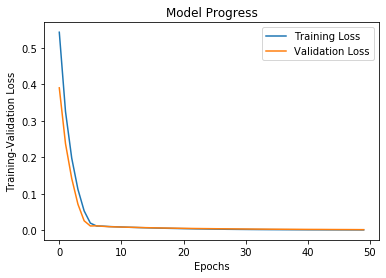

In [26]:
plt.plot(ep_history.history["loss"])
plt.plot(ep_history.history["val_loss"])
plt.title("Model Progress")
plt.ylabel("Training-Validation Loss")
plt.xlabel("Epochs")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [27]:
# so we can see after almost 10 epochs there was not significant improvement in model. So we can change our epochs to 10. 
# Make sure you try it with yourself and also try to play with the number of neurons.

In [28]:
# Compare with test data. You can see model is providing very good accuracy.

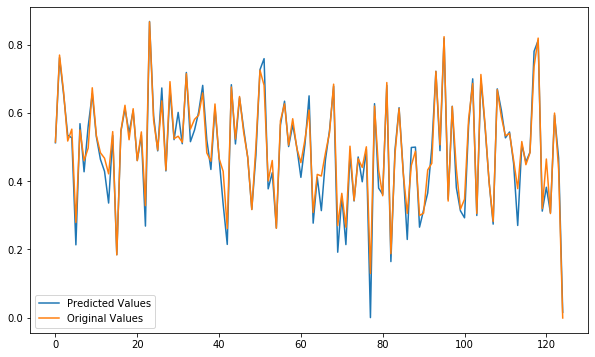

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(y_test)
plt.plot(model.predict([X_test]))
plt.legend(["Predicted Values", "Original Values"])


In [30]:
y_test[0:10]

array([[0.51220225],
       [0.76168793],
       [0.6538108 ],
       [0.53430602],
       [0.52673735],
       [0.21316327],
       [0.56811431],
       [0.42720002],
       [0.56035434],
       [0.65554063]])

In [31]:
test_loss = model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 32us/step


In [32]:
test_loss # loss value, which is very small. It means our model is good.

0.0012116745924577116

In [33]:
# Predict
X_predict = np.array([[1, 40, 40000, 10000, 80000]])
y_predict = model.predict(X_predict)
y_predict[0][0]  # So congrats our model is evaluating

32916.918